# NYC MTA Daily Ridership Data (since 2020) Exploration
Click [here](https://data.ny.gov/Transportation/MTA-Daily-Ridership-Data-Beginning-2020/vxuj-8kew) for data source 

## Summary of Data

### Description
The daily ridership dataset provides systemwide ridership and traffic estimates for subways, buses, Long Island Rail Road, Metro-North Railroad, Access-A-Ride, and Bridges and Tunnels, beginning 3/1/20 (4/1/20 for LIRR and Metro-North) through till present day, and provides a percentage comparison against a comparable pre-pandemic date.

Collected by Metropolitan Transportation Authority and covers the New York Metropolitan Area. Due to the processes followed to allow next-day ridership and traffic figures to be published, the figures in this dataset may differ from official ridership totals published elsewhere by MTA.

### Metadata

1331 Rows
15 Columns

| Column Name | Description | Type |
| --- | --- | --- |
| Date | The date of travel (MM/DD/YYYY). | Date & Time |
| Subways: Total Estimated Ridership | The daily total estimated subway ridership. | Number |
| Subways: % of Comparable Pre-Pandemic Day | The daily ridership estimate as a percentage of subway ridership on an equivalent day prior to the COVID-19 pandemic. | Number |
| Busses: Total Estimated Ridership | The daily total estimated bus ridership. | Number |
| Busses: % of Comparable Pre-Pandemic Day | The daily ridership estimate as a percentage of bus ridership on an equivalent day prior to the COVID-19 pandemic. | Number |
| LIRR: Total Estimated Ridership | The daily total estimated LIRR ridership. | Number |
| LIRR: % of Comparable Pre-Pandemic Day | The daily ridership estimate as a percentage of LIRR ridership on an equivalent day prior to the COVID-19 pandemic. | Number |
| Metro-North: Total Estimated Ridership | The daily total estimated Metro-North ridership. | Number |
| Metro-North: % of Comparable Pre-Pandemic Day | The daily ridership estimate as a percentage of Metro-North ridership on an equivalent day prior to the COVID-19 pandemic. | Number |
| Access-A-Ride: Total Scheduled Trips | The daily total scheduled Access-A-Ride trips. | Number |
| Access-A-Ride: % of Comparable Pre-Pandemic Day | The daily total scheduled trips  as a percentage of Access-A-Ride trips on an equivalent day prior to the COVID-19 pandemic. | Number |
| Bridges and Tunnels: Total Traffic | The daily total Bridges and Tunnels traffic. | Number | 
| Bridges and Tunnels: % of Comparable Pre-Pandemic Day	| The daily total traffic as a percentage of total traffic on an equivalent day prior to the COVID-19 pandemic. | Number | 
| Staten Island Railway: Total Estimated Ridership | The daily total estimated SIR ridership. | Number
| Staten Island Railway: % of Comparable Pre-Pandemic Day | The daily ridership estimate as a percentage of SIR ridership on an equivalent day prior to the COVID-19 pandemic. | Number |

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #for readability


df = pd.read_csv('MTA-Daily-Ridership-Data-Beginning-2020.csv')

# Sample Data
df.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,03/01/2020,2212965,0.97,984908,0.99,NaN,NaN,55826,0.59,19922,1.13,786961,0.98,1636.0,0.52
1,03/02/2020,5329915,0.96,2209066,0.99,321569.0,1.03,180702,0.66,30338,1.02,874620,0.95,17140.0,1.07
2,03/03/2020,5481103,0.98,2228608,0.99,319727.0,1.02,190648,0.69,32767,1.10,882175,0.96,17453.0,1.09
3,03/04/2020,5498809,0.99,2177165,0.97,311662.0,0.99,192689,0.70,34297,1.15,905558,0.98,17136.0,1.07
4,03/05/2020,5496453,0.99,2244515,1.00,307597.0,0.98,194387,0.70,33209,1.12,929298,1.01,17203.0,1.08


In [31]:
# let us only examine the ridership of nyc transit/transport in 2022

filtered_columns_df = df[["Date", "Subways: Total Estimated Ridership", "Buses: Total Estimated Ridership", "Access-A-Ride: Total Scheduled Trips", "Bridges and Tunnels: Total Traffic", "Staten Island Railway: Total Estimated Ridership"]]
filtered_columns_df['Date'] = pd.to_datetime(filtered_columns_df['Date'])
desired_start_date = pd.to_datetime('01/01/2022')
desired_end_date = pd.to_datetime('12/31/2022')
filtered_data = filtered_columns_df.loc[(filtered_columns_df['Date'] >= desired_start_date) & (filtered_columns_df['Date'] <= desired_end_date)]

In [32]:
# Calculate and look at monthly averages for readability
monthly_averages = filtered_data.groupby(filtered_data['Date'].dt.strftime('%Y-%m')).mean()

<Figure size 1200x600 with 0 Axes>

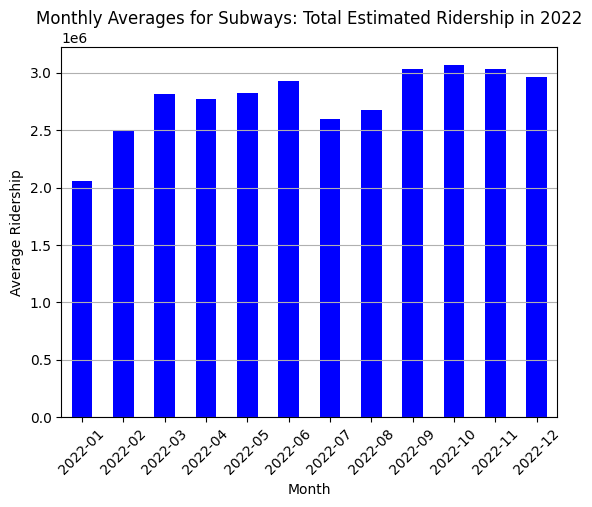

<Figure size 1200x600 with 0 Axes>

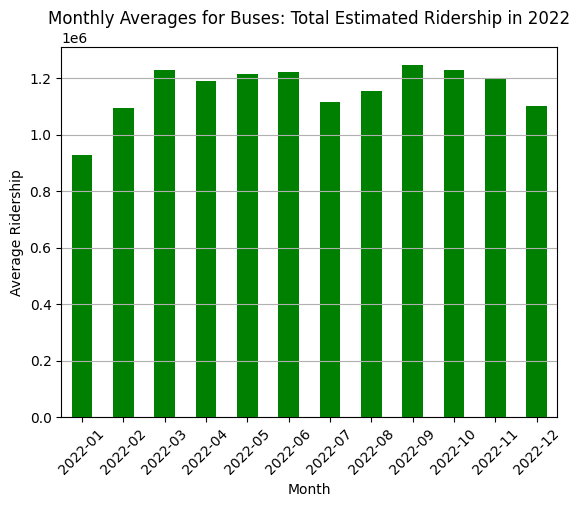

<Figure size 1200x600 with 0 Axes>

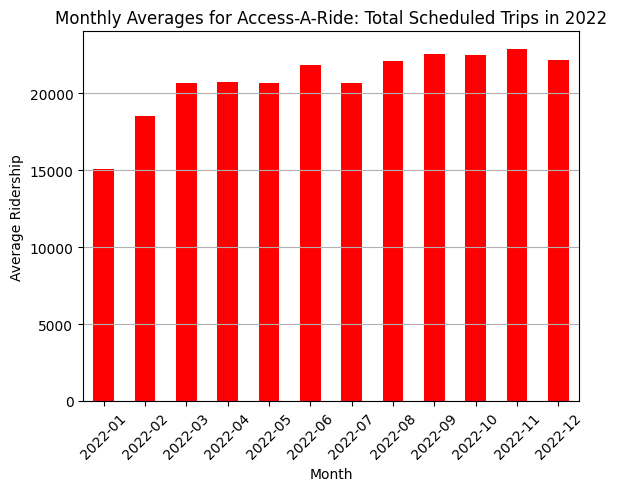

<Figure size 1200x600 with 0 Axes>

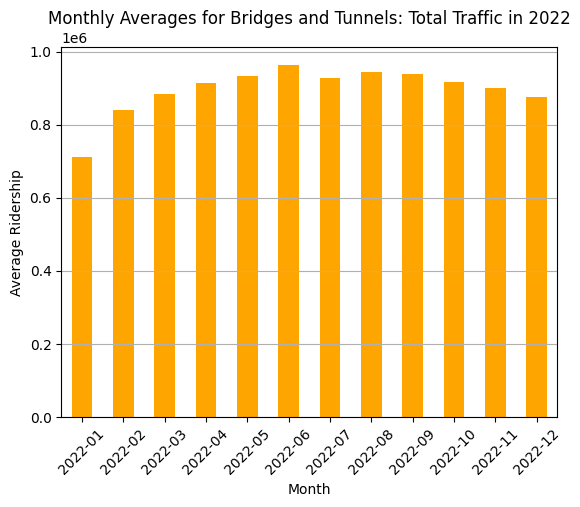

<Figure size 1200x600 with 0 Axes>

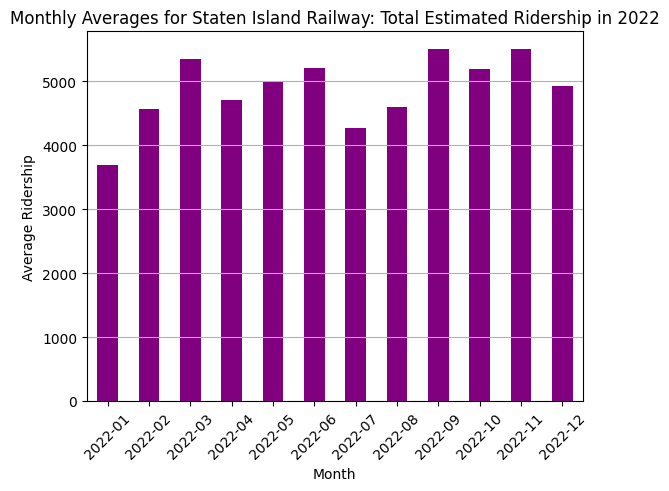

In [33]:
# Plot the monthly averages
colors = ['blue', 'green', 'red', 'orange', 'purple']
for column, color in zip(monthly_averages.columns, colors):
    plt.figure(figsize=(12, 6))
    monthly_averages[[column]].plot(kind='bar', legend=False, color=color)
    plt.title(f'Monthly Averages for {column} in 2022')
    plt.xlabel('Month')
    plt.ylabel('Average Ridership')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

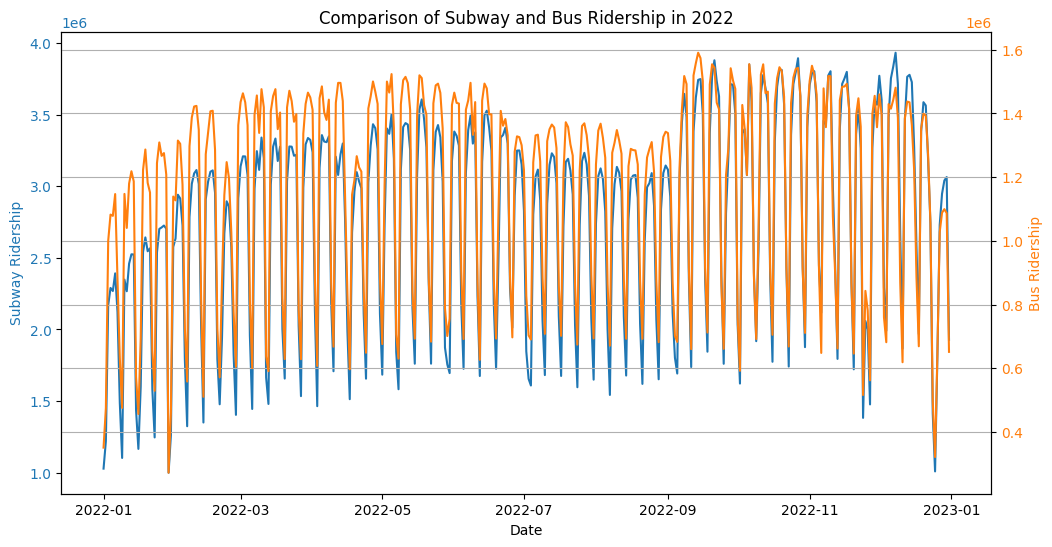

In [34]:
# can compare ridership with subways and busses 


fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Subway Ridership', color='tab:blue')
ax1.plot(filtered_data['Date'], filtered_data['Subways: Total Estimated Ridership'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (right y-axis) that shares the same x-axis
ax2 = ax1.twinx()

# Plot bus ridership on the second y-axis (right y-axis)
ax2.set_ylabel('Bus Ridership', color='tab:orange')
ax2.plot(filtered_data['Date'], filtered_data['Buses: Total Estimated Ridership'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# You can add titles, legends, and labels as needed
plt.title('Comparison of Subway and Bus Ridership in 2022')
plt.xlabel('Date')
plt.grid()

# Show the plot
plt.show()




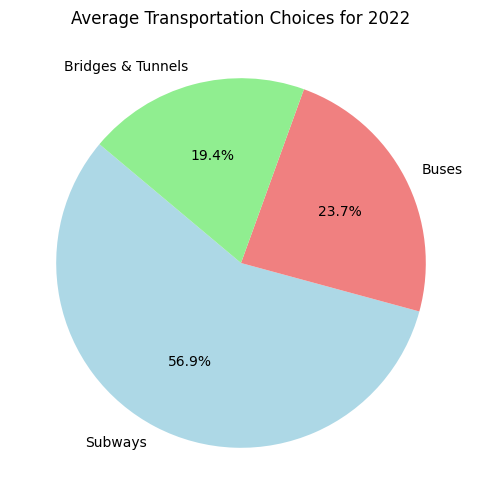

In [35]:
filtered_data['Total Ridership'] = filtered_data['Subways: Total Estimated Ridership'] + filtered_data['Buses: Total Estimated Ridership'] + filtered_data['Bridges and Tunnels: Total Traffic']
filtered_data['YearMonth'] = filtered_data['Date'].dt.strftime('%Y-%m')


filtered_data['Percentage Subways'] = (filtered_data['Subways: Total Estimated Ridership'] / filtered_data['Total Ridership']) * 100
filtered_data['Percentage Buses'] = (filtered_data['Buses: Total Estimated Ridership'] / filtered_data['Total Ridership']) * 100
filtered_data['Percentage Bridges & Tunnels'] = (filtered_data['Bridges and Tunnels: Total Traffic'] / filtered_data['Total Ridership']) * 100

monthly_averages = filtered_data.groupby('YearMonth').mean()

average_percentage_subways = monthly_averages['Percentage Subways']
average_percentage_buses = monthly_averages['Percentage Buses']
average_percentage_bridges_tunnels = monthly_averages['Percentage Bridges & Tunnels']

labels = ['Subways', 'Buses', 'Bridges & Tunnels']
sizes = [average_percentage_subways.mean(), average_percentage_buses.mean(), average_percentage_bridges_tunnels.mean()]

colors = ['lightblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Average Transportation Choices for 2022')
plt.show()

